## Download Code

In [ ]:
!wget https://www.dropbox.com/s/r8a823sspfjxbtg/classification.zip?dl=1 -O classification.zip

--2023-09-15 18:03:29--  https://www.dropbox.com/s/r8a823sspfjxbtg/classification.zip?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/dl/r8a823sspfjxbtg/classification.zip [following]
--2023-09-15 18:03:29--  https://www.dropbox.com/s/dl/r8a823sspfjxbtg/classification.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc5161095de2ba56692369330fff.dl.dropboxusercontent.com/cd/0/get/CDyxBJOss1UUwyVTy1EIBWfCFY6iQOLQgmQ4gql2etgl3cXJ6lK3FulhkaWZ4Fzd1SfJkSmZHSS4U6Q62eF5GaWkRqNlSOVhtSYC6SX7RSM4MxNFfvmm1pOGRQQZ8eRPaABf3KFNzFpvyiVjpV2Tsh38/file?dl=1# [following]
--2023-09-15 18:03:30--  https://uc5161095de2ba56692369330fff.dl.dropboxusercontent.com/cd/0/get/CDyxBJOss1UUwyVTy1EIBWfCFY6iQOLQgmQ4gql2etgl3cXJ6lK3FulhkaWZ4Fzd1SfJkSmZHSS4U6Q6

In [ ]:
!unzip classification.zip

Streaming output truncated to the last 5000 lines.
  inflating: classification/train/cloudy/train_32617.jpg  
  inflating: classification/train/cloudy/train_32698.jpg  
  inflating: classification/train/cloudy/train_32717.jpg  
  inflating: classification/train/cloudy/train_32802.jpg  
  inflating: classification/train/cloudy/train_32828.jpg  
  inflating: classification/train/cloudy/train_32830.jpg  
  inflating: classification/train/cloudy/train_32846.jpg  
  inflating: classification/train/cloudy/train_32869.jpg  
  inflating: classification/train/cloudy/train_32973.jpg  
  inflating: classification/train/cloudy/train_32993.jpg  
  inflating: classification/train/cloudy/train_33140.jpg  
  inflating: classification/train/cloudy/train_3327.jpg  
  inflating: classification/train/cloudy/train_33299.jpg  
  inflating: classification/train/cloudy/train_33313.jpg  
  inflating: classification/train/cloudy/train_33425.jpg  
  inflating: classification/train/cloudy/train_33466.jpg  
  infl

### Immporting the Dependencies

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
!pwd

/content/classification


In [ ]:
import os
os.chdir('classification')

In [ ]:
img_dir = 'train/'

In [ ]:
classes = ['cloudy', 'desert', 'green_area', 'water']

In [ ]:
img_path = os.path.join(img_dir, classes[0])

In [ ]:
img_path

'train/cloudy'

In [ ]:
img_names = os.listdir(img_path)

In [ ]:
img_path_cloudy = os.path.join(img_path, img_names[0])

In [ ]:
img_path_cloudy

'train/cloudy/train_8742.jpg'

In [ ]:
import cv2

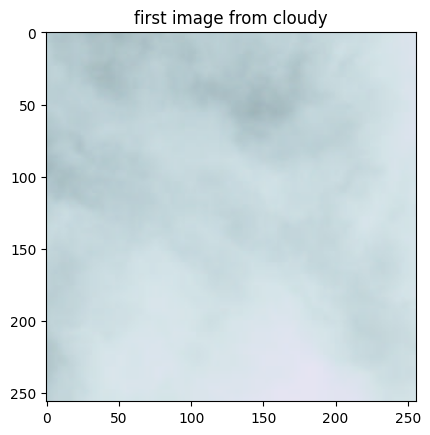

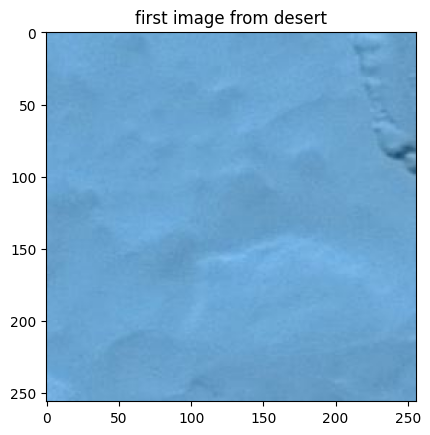

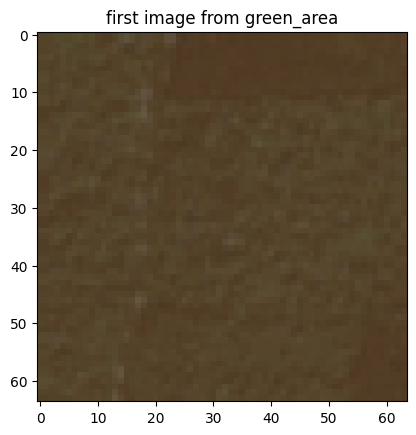

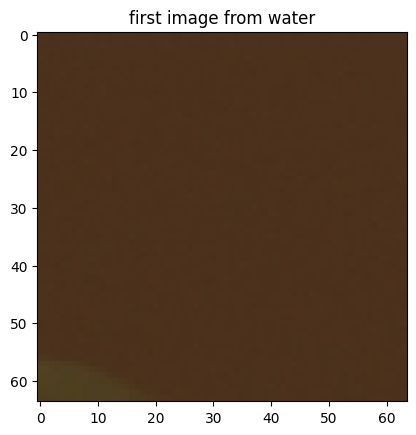

In [ ]:
for cls in classes:
  img_path = os.path.join(img_dir, cls)
  first_img = os.path.join(img_path, os.listdir(img_path)[0])
  img = cv2.imread(first_img)
  plt.imshow(img)
  plt.title(f'first image from {cls}')
  plt.show()

### Dataloader

In [ ]:
import torchvision
import torch

In [ ]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Resize((128, 128))])

In [ ]:
train_dataset = torchvision.datasets.ImageFolder(root = 'train', transform=transform)

In [ ]:
valid_dataset = torchvision.datasets.ImageFolder(root = 'valid', transform=transform)

### Model Building

In [ ]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [ ]:
class net(nn.Module):
  def __init__(self, in_channel: int , output_classes = 4):
    super(net,self).__init__()
    self.c1 = nn.Conv2d(in_channels = in_channel, out_channels=16, kernel_size=3, padding = 'same', stride = 1)
    self.p1 = nn.MaxPool2d(2,2)
    self.c2 = nn.Conv2d(in_channels = 16, out_channels=32, kernel_size=3, padding = 'same', stride = 1)
    self.l1 = nn.Linear(32*32*32, 512)
    self.l2 = nn.Linear(512, 120)
    self.l3 = nn.Linear(120,output_classes)

  def forward(self, x):
    x = F.relu(self.c1(x))
    x = self.p1(x)
    x = self.p1(F.relu(self.c2(x)))
    #print(x.shape)
    x = F.relu(self.l1(x.view(-1, 32*32*32)))
    x = F.relu(self.l2(x))
    return F.softmax(self.l3(x))

In [ ]:
model = net(in_channel = 3)
x = torch.rand(64,3,128,128)   #[N, C, W, H]
out = model.forward(x)
print(out.shape)

torch.Size([64, 4])


<ipython-input-161-24c14a8a4d74>:18: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(self.l3(x))


In [ ]:
import torchvision.transforms as transforms

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
from torch.utils.data import DataLoader

train_loader = DataLoader(dataset = train_dataset, batch_size = 64, shuffle=True)
val_loader = DataLoader(dataset = valid_dataset, batch_size = 64, shuffle=True)

In [ ]:
from tqdm import tqdm
num_epochs = 10

for epoch in tqdm(range(num_epochs)):
  training_loss = 0
  val_loss = 0
  count = 0
  for (image, label) in train_loader:
    yhat = model(image)
    loss = criterion(yhat, label)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    training_loss+=loss.item()
    count+=1

  print(f'training loss for epoch {epoch}: {training_loss/count}')

  count = 0
  with torch.no_grad():
    for (image, label) in val_loader:
      yhat = model(image)
      loss = criterion(yhat, label)
      val_loss+=loss
      count+=1


  print(f'val loss for epoch {epoch}: {val_loss/count}')

  0%|          | 0/10 [00:00<?, ?it/s]<ipython-input-161-24c14a8a4d74>:18: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(self.l3(x))


training loss for epoch 0: 1.047112349286137


 10%|█         | 1/10 [01:54<17:11, 114.62s/it]

val loss for epoch 0: 1.0263797044754028
training loss for epoch 1: 0.9292618639497872


 20%|██        | 2/10 [03:47<15:08, 113.60s/it]

val loss for epoch 1: 1.0302551984786987
training loss for epoch 2: 0.9038071941180401


 30%|███       | 3/10 [05:40<13:13, 113.32s/it]

val loss for epoch 2: 0.921501636505127
training loss for epoch 3: 0.8663323722689985


 40%|████      | 4/10 [07:34<11:20, 113.47s/it]

val loss for epoch 3: 0.9525480270385742
training loss for epoch 4: 0.8817154951842434


 50%|█████     | 5/10 [09:28<09:28, 113.61s/it]

val loss for epoch 4: 0.9413170218467712
training loss for epoch 5: 0.8865384229694504


 60%|██████    | 6/10 [11:23<07:36, 114.07s/it]

val loss for epoch 5: 1.0209009647369385
training loss for epoch 6: 0.8851744956280811


 70%|███████   | 7/10 [13:18<05:43, 114.45s/it]

val loss for epoch 6: 0.9264362454414368
training loss for epoch 7: 0.8636417008308043


 80%|████████  | 8/10 [15:15<03:50, 115.44s/it]

val loss for epoch 7: 0.9812586903572083
training loss for epoch 8: 0.8617031631699528


 90%|█████████ | 9/10 [17:20<01:58, 118.44s/it]

val loss for epoch 8: 0.9268803596496582
training loss for epoch 9: 0.861822717879192


100%|██████████| 10/10 [19:41<00:00, 118.18s/it]

val loss for epoch 9: 0.9254465699195862
